In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def generate_data_nD(length):
    # Initialize series
    series = np.array(np.zeros((length, n)))
    
    # Generate series
    for t in range(1, length):
        # Generate VAR model
        series[t] = np.matmul(A, series[t - 1]) + np.random.multivariate_normal(np.zeros(n), Sigma)
    
    return series

In [42]:
# Example values
A = np.array([[0.5, 0.0], [0.3, 0.4]])
Sigma = np.array([[1, 0], [0, 2]])

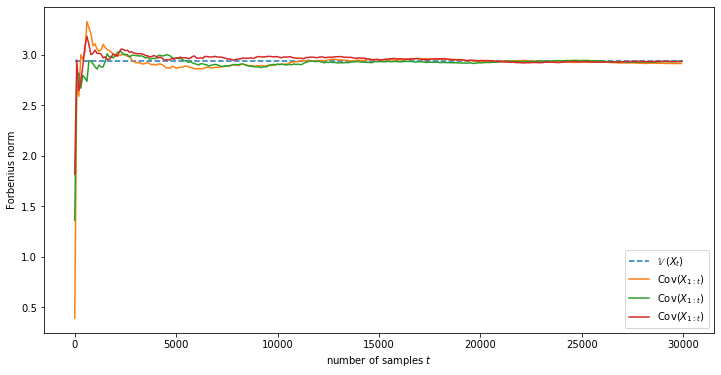

In [73]:
# define dimension, length of data sample
n, length = np.shape(A)[0], 30000

# generate data, three samples
series1 = generate_data_nD(length)
series2 = generate_data_nD(length)
series3 = generate_data_nD(length)

# get iteratively estimated covariance norms
covs1 = [np.linalg.norm(np.cov(series1[:i].transpose())) for i in range(5, length, 100)]
covs2 = [np.linalg.norm(np.cov(series2[:i].transpose())) for i in range(5, length, 100)]
covs3 = [np.linalg.norm(np.cov(series3[:i].transpose())) for i in range(5, length, 100)]

# get expected covariance
covariance_X = np.matmul(np.linalg.inv(np.identity(n ** 2) - np.kron(A, A)), Sigma.reshape(n ** 2)).reshape((n, n))

# plot results
plt.figure(figsize=(12,6))

# plot expected value, sample will converge to this
plt.plot([0, length], [np.linalg.norm(covariance_X), np.linalg.norm(covariance_X)], linestyle = '--', label = "$\mathbb{V}\ (X_t)$")

# plot three samples
plt.plot(range(5, length, 100), covs1, label = "Cov($X_{1:t}$)")
plt.plot(range(5, length, 100), covs2, label = "Cov($X_{1:t}$)")
plt.plot(range(5, length, 100), covs3, label = "Cov($X_{1:t}$)")

plt.xlabel("number of samples $t$")
plt.ylabel("Forbenius norm")

plt.legend()

plt.show()